In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as PLT
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
import os
from tensorflow.keras.optimizers.legacy import Adam

os.path.expanduser('/home/masoud/.keras/')

'/home/masoud/.keras/'

In [4]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [23]:
image_generator = ImageDataGenerator(
    rescale=1.0/255.0
)
batch_size = 15

generator = image_generator.flow_from_directory(
    '../../../datasets/15-Scene/train/',
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(150,150)
)

generator_test = image_generator.flow_from_directory(
    '../../../datasets/15-Scene/test',
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(150,150)
)

Found 4035 images belonging to 15 classes.
Found 450 images belonging to 15 classes.


In [24]:
generator.image_shape

(150, 150, 3)

In [31]:
model = Sequential([
#     ZeroPadding2D(padding=(1,1)),
    Conv2D(64, 2, activation='relu', input_shape=generator.image_shape),
    Dropout(0.4),
    MaxPool2D(pool_size=8),
    Conv2D(32, 2, activation='relu', padding='same'),
    Dropout(0.4),
    MaxPool2D(pool_size=4),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
# model.summary()

In [ ]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=500,
)

Epoch 1/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5985 - accuracy: 0.7787 - val_loss: 1.3282 - val_accuracy: 0.5756
Epoch 2/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5940 - accuracy: 0.7871 - val_loss: 1.3051 - val_accuracy: 0.5800
Epoch 3/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5910 - accuracy: 0.7817 - val_loss: 1.2490 - val_accuracy: 0.5956
Epoch 4/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5771 - accuracy: 0.7866 - val_loss: 1.2309 - val_accuracy: 0.6222
Epoch 5/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5835 - accuracy: 0.7970 - val_loss: 1.2912 - val_accuracy: 0.5933
Epoch 6/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5753 - accuracy: 0.7896 - val_loss: 1.3214 - val_accuracy: 0.5867
Epoch 7/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5781 - accuracy: 0.7846 - val_loss: 1.3633 - val_accuracy:

269/269 [==============================] - 3s 13ms/step - loss: 0.4866 - accuracy: 0.8201 - val_loss: 1.3252 - val_accuracy: 0.5822
Epoch 58/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4735 - accuracy: 0.8245 - val_loss: 1.3737 - val_accuracy: 0.5911
Epoch 59/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4628 - accuracy: 0.8315 - val_loss: 1.3252 - val_accuracy: 0.5711
Epoch 60/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4687 - accuracy: 0.8263 - val_loss: 1.3376 - val_accuracy: 0.5889
Epoch 61/500
269/269 [==============================] - 3s 13ms/step - loss: 0.5016 - accuracy: 0.8245 - val_loss: 1.5184 - val_accuracy: 0.5711
Epoch 62/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4751 - accuracy: 0.8235 - val_loss: 1.3360 - val_accuracy: 0.5956
Epoch 63/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4737 - accuracy: 0.8280 - val_loss: 1.3774 - val_accuracy: 0.577

269/269 [==============================] - 3s 13ms/step - loss: 0.4351 - accuracy: 0.8424 - val_loss: 1.4670 - val_accuracy: 0.5578
Epoch 114/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4509 - accuracy: 0.8337 - val_loss: 1.4929 - val_accuracy: 0.5822
Epoch 115/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4154 - accuracy: 0.8486 - val_loss: 1.4251 - val_accuracy: 0.5756
Epoch 116/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4214 - accuracy: 0.8478 - val_loss: 1.3375 - val_accuracy: 0.5889
Epoch 117/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4290 - accuracy: 0.8429 - val_loss: 1.3478 - val_accuracy: 0.5733
Epoch 118/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4051 - accuracy: 0.8548 - val_loss: 1.5037 - val_accuracy: 0.5822
Epoch 119/500
269/269 [==============================] - 3s 13ms/step - loss: 0.4213 - accuracy: 0.8444 - val_loss: 1.2975 - val_accuracy:

269/269 [==============================] - 3s 12ms/step - loss: 0.3911 - accuracy: 0.8572 - val_loss: 1.6320 - val_accuracy: 0.5622
Epoch 170/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3904 - accuracy: 0.8580 - val_loss: 1.4200 - val_accuracy: 0.5756
Epoch 171/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3713 - accuracy: 0.8637 - val_loss: 1.5188 - val_accuracy: 0.5822
Epoch 172/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3767 - accuracy: 0.8664 - val_loss: 1.4906 - val_accuracy: 0.5889
Epoch 173/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3984 - accuracy: 0.8558 - val_loss: 1.5645 - val_accuracy: 0.5711
Epoch 174/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3866 - accuracy: 0.8632 - val_loss: 1.6218 - val_accuracy: 0.5733
Epoch 175/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3845 - accuracy: 0.8694 - val_loss: 1.5846 - val_accuracy:

269/269 [==============================] - 3s 13ms/step - loss: 0.3570 - accuracy: 0.8652 - val_loss: 1.5399 - val_accuracy: 0.5756
Epoch 226/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3594 - accuracy: 0.8753 - val_loss: 1.6119 - val_accuracy: 0.5800
Epoch 227/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3438 - accuracy: 0.8721 - val_loss: 1.3901 - val_accuracy: 0.6200
Epoch 228/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3617 - accuracy: 0.8709 - val_loss: 1.6690 - val_accuracy: 0.5756
Epoch 229/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3595 - accuracy: 0.8714 - val_loss: 1.6124 - val_accuracy: 0.5822
Epoch 230/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3732 - accuracy: 0.8677 - val_loss: 1.4752 - val_accuracy: 0.5978
Epoch 231/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3416 - accuracy: 0.8741 - val_loss: 1.3873 - val_accuracy:

269/269 [==============================] - 3s 13ms/step - loss: 0.3400 - accuracy: 0.8800 - val_loss: 1.5819 - val_accuracy: 0.5689
Epoch 282/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3427 - accuracy: 0.8815 - val_loss: 1.6586 - val_accuracy: 0.5800
Epoch 283/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3499 - accuracy: 0.8756 - val_loss: 1.5105 - val_accuracy: 0.6000
Epoch 284/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3527 - accuracy: 0.8776 - val_loss: 1.7631 - val_accuracy: 0.5622
Epoch 285/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3305 - accuracy: 0.8753 - val_loss: 1.6081 - val_accuracy: 0.5822
Epoch 286/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3355 - accuracy: 0.8805 - val_loss: 1.5899 - val_accuracy: 0.5800
Epoch 287/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3604 - accuracy: 0.8736 - val_loss: 1.9207 - val_accuracy:

269/269 [==============================] - 3s 13ms/step - loss: 0.3144 - accuracy: 0.8922 - val_loss: 1.8280 - val_accuracy: 0.5711
Epoch 338/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3374 - accuracy: 0.8793 - val_loss: 1.6500 - val_accuracy: 0.5911
Epoch 339/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3336 - accuracy: 0.8753 - val_loss: 1.5990 - val_accuracy: 0.5844
Epoch 340/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3238 - accuracy: 0.8828 - val_loss: 1.7935 - val_accuracy: 0.5733
Epoch 341/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3173 - accuracy: 0.8848 - val_loss: 1.7942 - val_accuracy: 0.5733
Epoch 342/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3162 - accuracy: 0.8848 - val_loss: 1.4783 - val_accuracy: 0.6022
Epoch 343/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3320 - accuracy: 0.8835 - val_loss: 1.6757 - val_accuracy:

269/269 [==============================] - 3s 13ms/step - loss: 0.3326 - accuracy: 0.8862 - val_loss: 1.6469 - val_accuracy: 0.6133
Epoch 394/500
269/269 [==============================] - 3s 12ms/step - loss: 0.3257 - accuracy: 0.8818 - val_loss: 1.7451 - val_accuracy: 0.5733
Epoch 395/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3463 - accuracy: 0.8771 - val_loss: 1.6263 - val_accuracy: 0.5756
Epoch 396/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3144 - accuracy: 0.8860 - val_loss: 1.7987 - val_accuracy: 0.5733
Epoch 397/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3360 - accuracy: 0.8833 - val_loss: 1.4592 - val_accuracy: 0.6133
Epoch 398/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3420 - accuracy: 0.8813 - val_loss: 1.5752 - val_accuracy: 0.5956
Epoch 399/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3283 - accuracy: 0.8798 - val_loss: 1.8697 - val_accuracy:

269/269 [==============================] - 3s 12ms/step - loss: 0.3542 - accuracy: 0.8748 - val_loss: 1.8807 - val_accuracy: 0.5222
Epoch 450/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3322 - accuracy: 0.8853 - val_loss: 1.7973 - val_accuracy: 0.5667
Epoch 451/500
269/269 [==============================] - 3s 12ms/step - loss: 0.3518 - accuracy: 0.8734 - val_loss: 1.5512 - val_accuracy: 0.6044
Epoch 452/500
269/269 [==============================] - 3s 12ms/step - loss: 0.3133 - accuracy: 0.8830 - val_loss: 2.0521 - val_accuracy: 0.5467
Epoch 453/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3172 - accuracy: 0.8857 - val_loss: 1.8682 - val_accuracy: 0.5733
Epoch 454/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3203 - accuracy: 0.8850 - val_loss: 1.6563 - val_accuracy: 0.6044
Epoch 455/500
269/269 [==============================] - 3s 13ms/step - loss: 0.3131 - accuracy: 0.8862 - val_loss: 1.8021 - val_accuracy:

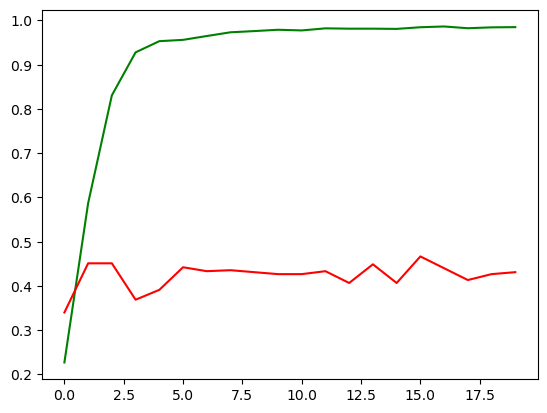

In [22]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

# Another Way

In [17]:
model_conv = ResNet152(weights='imagenet', input_shape=generator.image_shape, include_top=False)

234698864/234698864 [==============================] - 996s 4us/step


In [20]:
model = models.Sequential()
model.add(model_conv)
model.add(layers.Flatten())
model.add(layers.Dense(15,activation='relu' ))
# model.add(layers.Dropout(.3))
# model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=20,
)